In [8]:
import pandas as pd
import sklearn
import pyod
import seaborn as sns
from matplotlib import pyplot as plt

In [12]:
X_train, X_test, y_train, y_test = pyod.utils.generate_data(contamination=0.01, behaviour="new", random_state=42)
df_train = pd.DataFrame(X_train, columns=["x1", "x2"])
df_test = pd.DataFrame(X_test, columns=["x1", "x2"])

df_train["y"] = y_train
df_test["y"] = y_test

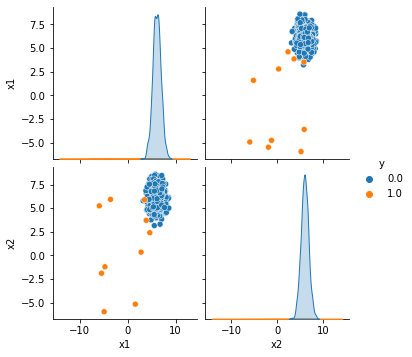

In [13]:
sns.pairplot(data=df_train, x_vars=["x1", "x2"], hue="y")

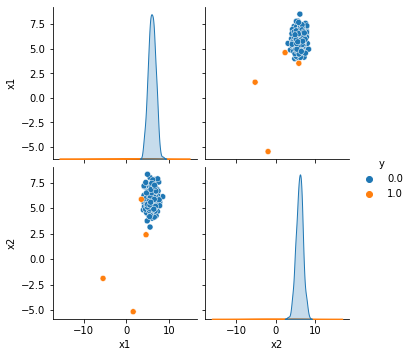

In [19]:
sns.pairplot(data=df_train.sample(n=256, random_state=42), x_vars=["x1", "x2"], hue="y")

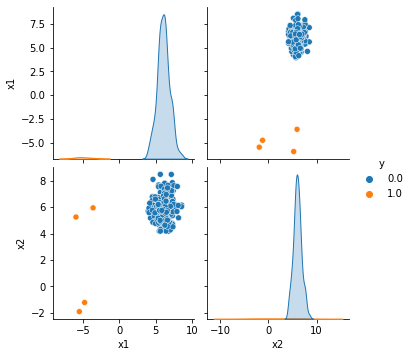

In [17]:
sns.pairplot(data=df_train.sample(n=256, random_state=30), x_vars=["x1", "x2"], hue="y")

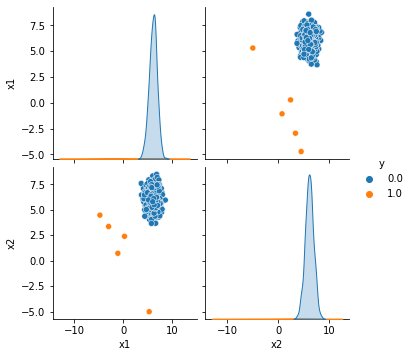

In [21]:
sns.pairplot(data=df_test, x_vars=["x1", "x2"], hue="y")

In [22]:
from sklearn.ensemble import IsolationForest

In [23]:
iforest = IsolationForest(max_samples=256, contamination="auto")

In [24]:
iforest.fit(X_train)

IsolationForest(max_samples=256)

In [31]:
score_series = abs(pd.Series(iforest.score_samples(X_test)))

In [32]:
score_series.describe()

count    500.000000
mean       0.437363
std        0.063650
min        0.377373
25%        0.394227
50%        0.414098
75%        0.458951
max        0.799342
dtype: float64

https://stats.stackexchange.com/questions/335274/scikit-learn-isolationforest-anomaly-score